Installing necessary packages

In [ ]:
!pip install -U scikit-learn imbalanced-learn

In [1]:
import pandas as pd
import numpy as np

1. Combining all the csv files and data preprocessing

In [2]:
import pandas as pd

users_df = pd.read_csv('users.csv')
likes_df = pd.read_csv('likes.csv') #/content/drive/MyDrive/sample_dataset/likes.csv
users_likes_df = pd.read_csv('users-likes.csv')

filtered_users_likes_df = users_likes_df[users_likes_df['userid'].isin(users_df['userid'])]

merged_df = filtered_users_likes_df.merge(likes_df, left_on='likeid', right_on='likeid')

final_df = merged_df.merge(users_df, left_on='userid', right_on='userid')

final_df.to_csv('final.csv', index=False)

In [3]:
final_df = pd.read_csv('final.csv')

num_rows = final_df.shape[0]

print(f'The final dataset contains {num_rows} rows.')

The final dataset contains 10612326 rows.


In [4]:
final_df.dropna(inplace=True)

num_rows = final_df.shape[0]

print(f'The final dataset contains {num_rows} rows.')

The final dataset contains 2571490 rows.


In [5]:
na_values = final_df.isna().sum()

print(na_values)

any_na = final_df.isna().any().any()
print(f'Are there any NA values left in the dataset? {any_na}')

userid       0
likeid       0
name         0
gender       0
age          0
political    0
ope          0
con          0
ext          0
agr          0
neu          0
dtype: int64
Are there any NA values left in the dataset? False


In [6]:
print("First few rows for a sanity check:")
print(final_df.head())
print("\nLast few rows for a sanity check:")
print(final_df.tail())

duplicate_rows = final_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

print("\nDescriptive statistics for numerical columns:")
print(final_df.describe())

print("\nValue counts for categorical columns:")
for col in final_df.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for {col}:")
    print(final_df[col].value_counts())

print("\nData types of each column:")
print(final_df.dtypes)

First few rows for a sanity check:
                                userid                            likeid  \
7774  ce110562b3e2f7e5cad3775b32d9caa5  b65f46d64c688fe98bdbcf93a76a71fc   
7775  ce110562b3e2f7e5cad3775b32d9caa5  295533f33bf160e76d7e95efadfe196c   
7776  ce110562b3e2f7e5cad3775b32d9caa5  a4f3b9c60196cb0920b2868d057c7961   
7777  ce110562b3e2f7e5cad3775b32d9caa5  1c88edef6a3d9b9fba1381f3db085dc9   
7778  ce110562b3e2f7e5cad3775b32d9caa5  e327fc881114e13a28e7513f6b85c4b1   

                                              name  gender  age  political  \
7774  Yo también me rei de la caída de otro jejeje       1   27        0.0   
7775                                       Titanic       1   27        0.0   
7776                                  Skinny Jeans       1   27        0.0   
7777                                        iTunes       1   27        0.0   
7778                         Official Grease Movie       1   27        0.0   

       ope   con   ext   agr   neu  
77

2. Generating a sparse matrix using likeid

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

encoder = OneHotEncoder(handle_unknown='ignore', sparse=True)
likes_matrix = encoder.fit_transform(final_df[['likeid']])

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=42) 
likes_matrix_reduced = svd.fit_transform(likes_matrix)

/Users/rohi/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:
import joblib

joblib.dump(encoder, 'encoder.joblib')

joblib.dump(svd, 'svd.joblib')


['svd.joblib']

3. Cross checking if everything is good (Data Validation)

In [8]:
personality_scores_min_max = final_df[['ope', 'con', 'ext', 'agr', 'neu']].agg(['min', 'max'])
print(personality_scores_min_max)

      ope   con   ext   agr   neu
min -5.49 -3.67 -3.08 -4.26 -2.13
max  1.90  2.24  1.92  2.32  2.85


In [9]:
anomalies = final_df.isnull().sum()
print("Anomalies in each column after merging:")
print(anomalies)

Anomalies in each column after merging:
userid       0
likeid       0
name         0
gender       0
age          0
political    0
ope          0
con          0
ext          0
agr          0
neu          0
dtype: int64


In [10]:
unique_users = final_df['userid'].nunique()
unique_likes = final_df['likeid'].nunique()
print(f"Unique users: {unique_users}, Unique likes: {unique_likes}")


Unique users: 27802, Unique likes: 587293


In [11]:
numerical_stats = final_df.describe()
print(numerical_stats)

             gender           age     political           ope           con  \
count  2.571490e+06  2.571490e+06  2.571490e+06  2.571490e+06  2.571490e+06   
mean   5.844565e-01  2.837862e+01  3.019063e-01  2.605666e-01 -8.405044e-02   
std    4.928156e-01  7.800643e+00  4.590849e-01  1.002537e+00  1.014672e+00   
min    0.000000e+00  1.800000e+01  0.000000e+00 -5.490000e+00 -3.670000e+00   
25%    0.000000e+00  2.400000e+01  0.000000e+00 -4.100000e-01 -7.900000e-01   
50%    1.000000e+00  2.600000e+01  0.000000e+00  4.200000e-01 -5.000000e-02   
75%    1.000000e+00  3.000000e+01  1.000000e+00  1.070000e+00  6.200000e-01   
max    1.000000e+00  7.900000e+01  1.000000e+00  1.900000e+00  2.240000e+00   

                ext           agr           neu  
count  2.571490e+06  2.571490e+06  2.571490e+06  
mean   8.088612e-02 -5.620676e-02  9.358822e-02  
std    1.003995e+00  1.027094e+00  1.014093e+00  
min   -3.080000e+00 -4.260000e+00 -2.130000e+00  
25%   -5.800000e-01 -6.800000e-01 -6.3

In [12]:
print(final_df.dtypes)

userid        object
likeid        object
name          object
gender         int64
age            int64
political    float64
ope          float64
con          float64
ext          float64
agr          float64
neu          float64
dtype: object


In [13]:
duplicate_ids = final_df['userid'].duplicated().sum()
print(f"Duplicate user IDs found: {duplicate_ids}")

Duplicate user IDs found: 2543688


In [14]:
duplicate_likes_per_user = final_df.duplicated(subset=['userid', 'likeid']).sum()
print(f"Duplicate likes per user found: {duplicate_likes_per_user}")

Duplicate likes per user found: 0


In [15]:
logical_inconsistencies = (final_df['age'] < 0) | (final_df['ope'] < -5.49) | (final_df['ope'] > 1.90)
print(f"Logical inconsistencies found: {logical_inconsistencies.sum()}")

Logical inconsistencies found: 0


4. Exploratory Data Analysis for Gender and Polical attributes

gender
1    1502924
0    1068566
Name: count, dtype: int64


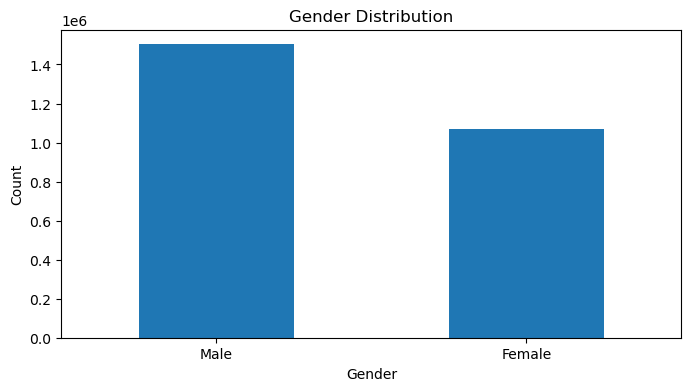

In [16]:
import matplotlib.pyplot as plt

gender_counts = final_df['gender'].value_counts()
print(gender_counts)

plt.figure(figsize=(8, 4))
gender_counts.plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.show()

political
0.0    1795141
1.0     776349
Name: count, dtype: int64


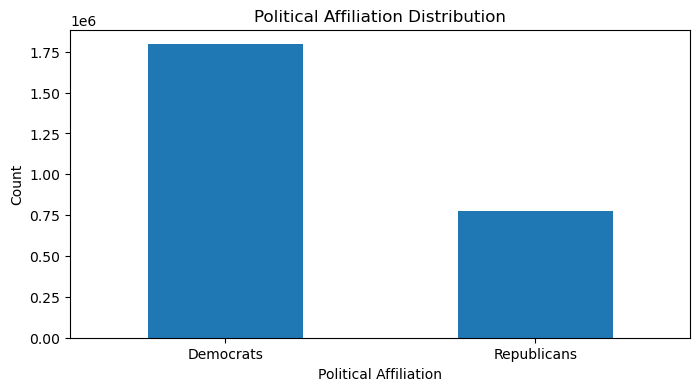

In [17]:
political_counts = final_df['political'].value_counts()
print(political_counts)

plt.figure(figsize=(8, 4))
political_counts.plot(kind='bar')
plt.title('Political Affiliation Distribution')
plt.xlabel('Political Affiliation')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Democrats', 'Republicans'], rotation=0)
plt.show()

4.1 Splitting the dataset into train and test

In [18]:
from sklearn.model_selection import train_test_split

ocean_features = final_df[['ope', 'con', 'ext', 'agr', 'neu']].values

X = np.hstack((likes_matrix_reduced, ocean_features))
y = final_df[['age', 'gender', 'political']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)


4.2 Balancing the gender and politcal values 

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

y_gender = y_train.iloc[:, 1]
X_train_balanced, y_gender_balanced = smote.fit_resample(X_train, y_gender)

In [20]:
y_political = y_train.iloc[:, 2]
X_train_political_balanced, y_political_balanced = smote.fit_resample(X_train, y_political)

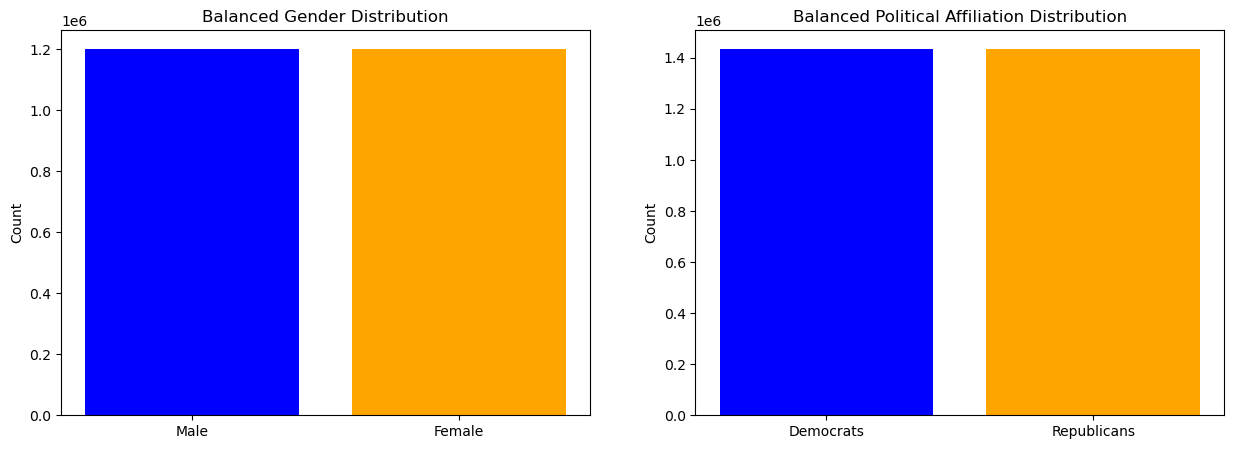

In [21]:
import matplotlib.pyplot as plt

gender_counts_balanced = pd.Series(y_gender_balanced).value_counts()

political_counts_balanced = pd.Series(y_political_balanced).value_counts()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].bar(gender_counts_balanced.index, gender_counts_balanced.values, color=['blue', 'orange'])
axes[0].set_title('Balanced Gender Distribution')
axes[0].set_xticks(gender_counts_balanced.index)
axes[0].set_xticklabels(['Male', 'Female'])
axes[0].set_ylabel('Count')

axes[1].bar(political_counts_balanced.index, political_counts_balanced.values, color=['blue', 'orange'])
axes[1].set_title('Balanced Political Affiliation Distribution')
axes[1].set_xticks(political_counts_balanced.index)
axes[1].set_xticklabels(['Democrats', 'Republicans'])
axes[1].set_ylabel('Count')

plt.show()

5. Training the Model

In [23]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

X_combined = np.hstack((likes_matrix_reduced, ocean_features))

y_age = final_df['age']
y_gender = final_df['gender']
y_political = final_df['political']

X_train, X_test, y_age_train, y_age_test = train_test_split(X_combined, y_age, test_size=0.2, random_state=42)
_, _, y_gender_train, y_gender_test = train_test_split(X_combined, y_gender, test_size=0.2, random_state=42)
_, _, y_political_train, y_political_test = train_test_split(X_combined, y_political, test_size=0.2, random_state=42)

gb_regressor = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1.0,
    max_features=None,
    random_state=42
)
gb_classifier_gender = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1.0,
    max_features=None,
    random_state=42
)

gb_classifier_political = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1.0,
    max_features=None,
    random_state=42
)

age_scores = cross_val_score(gb_regressor, X_train, y_age_train, cv=10, scoring='neg_mean_squared_error')
print(f"Age prediction - Mean Squared Error: {age_scores.mean():.3f} (+/- {age_scores.std() * 2:.3f})")

gender_scores = cross_val_score(gb_classifier_gender, X_train, y_gender_train, cv=10, scoring='accuracy')
print(f"Gender prediction - Accuracy: {gender_scores.mean():.3f} (+/- {gender_scores.std() * 2:.3f})")

political_scores = cross_val_score(gb_classifier_political, X_train, y_political_train, cv=10, scoring='accuracy')
print(f"Political prediction - Accuracy: {political_scores.mean():.3f} (+/- {political_scores.std() * 2:.3f})")

gb_regressor.fit(X_train, y_age_train)
gb_classifier_gender.fit(X_train, y_gender_train)
gb_classifier_political.fit(X_train, y_political_train)

age_predictions = gb_regressor.predict(X_test)
gender_predictions = gb_classifier_gender.predict(X_test)
political_predictions = gb_classifier_political.predict(X_test)


Age prediction - Mean Squared Error: -48.633 (+/- 0.242)
Gender prediction - Accuracy: 0.692 (+/- 0.004)
Political prediction - Accuracy: 0.798 (+/- 0.001)


5.1 Results and values

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

gender_precision = precision_score(y_gender_test, gender_predictions)
gender_recall = recall_score(y_gender_test, gender_predictions)
gender_f1 = f1_score(y_gender_test, gender_predictions)
gender_confusion_matrix = confusion_matrix(y_gender_test, gender_predictions)

political_precision = precision_score(y_political_test, political_predictions)
political_recall = recall_score(y_political_test, political_predictions)
political_f1 = f1_score(y_political_test, political_predictions)
political_confusion_matrix = confusion_matrix(y_political_test, political_predictions)

print("Gender Precision:", gender_precision)
print("Gender Recall:", gender_recall)
print("Gender F1 Score:", gender_f1)
print("Gender Confusion Matrix:\n", gender_confusion_matrix)

print("\nPolitical Precision:", political_precision)
print("Political Recall:", political_recall)
print("Political F1 Score:", political_f1)
print("Political Confusion Matrix:\n", political_confusion_matrix)

Gender Precision: 0.6913683205646297
Gender Recall: 0.8580028752845333
Gender F1 Score: 0.765724841812331
Gender Confusion Matrix:
 [[ 98712 115094]
 [ 42669 257823]]

Political Precision: 0.7084095666650184
Political Recall: 0.5545112054395087
Political F1 Score: 0.6220834298286243
Political Confusion Matrix:
 [[323903  35381]
 [ 69057  85957]]


In [27]:
import joblib

joblib.dump(gb_regressor, 'age_regressor.joblib')
joblib.dump(gb_classifier_gender, 'gender_classifier.joblib')
joblib.dump(gb_classifier_political, 'political_classifier.joblib')

['political_classifier.joblib']

Misc.

In [ ]:
'''likes_df_reduced = pd.DataFrame(likes_matrix_reduced, columns=[f'like_component_{i}' for i in range(likes_matrix_reduced.shape[1])])
df = pd.concat([final_df, likes_df_reduced], axis=1)

print('The first few rows of the dataset:')
print(df.head())'''

In [ ]:
'''svd_feature_cols = [col for col in df.columns if col.startswith('like_component_')]

ocean_scores_cols = ['ope', 'con', 'ext', 'agr', 'neu']'''

In [ ]:
'''print(df.columns)'''

In [ ]:
'''all(col in df.columns for col in svd_feature_cols + ocean_scores_cols)'''

In [ ]:
'''X = df[svd_feature_cols + ocean_scores_cols]

print(X.head())'''

In [ ]:
'''from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.multioutput import MultiOutputRegressor, MultiOutputClassifier

X = df[svd_feature_cols + ocean_scores_cols] 
y_age = df['age']  
y_political_gender = df[['political', 'gender']]  '''

In [ ]:
'''model_regressor = GradientBoostingRegressor(n_estimators=100,  
    learning_rate=0.1,  
    max_depth=3,  
    min_samples_split=2,  
    min_samples_leaf=1,  
    subsample=1.0,  
    max_features=None) 
model_classifier = GradientBoostingClassifier(n_estimators=100,  
    learning_rate=0.1,
    max_depth=3,  
    min_samples_split=2,  
    min_samples_leaf=1,  
    subsample=1.0,  
    max_features=None) 

scores_age = cross_val_score(model_regressor, X, y_age, cv=10)
print("Age Prediction - Cross-validation scores:", scores_age.mean())

multioutput_model = MultiOutputClassifier(model_classifier)
scores_political_gender = cross_val_score(multioutput_model, X, y_political_gender, cv=10)
print("Political and Gender Prediction - Cross-validation scores:", scores_political_gender.mean())
'''

# Initialize the Gradient Boosting Classifier---------------------------------------
#model = GradientBoostingClassifier(
#    n_estimators=100,  # Number of boosting stages to be run
 #   learning_rate=0.1,  # Learning rate or shrinkage
  #  max_depth=3,  # Maximum depth of the individual regression estimators
   # min_samples_split=2,  # Minimum number of samples required to split an internal node
    #min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
#    subsample=1.0,  # The fraction of samples to be used for fitting the individual base learners
 #   max_features=None  # The number of features to consider when looking for the best split
#)

# Perform 10-fold cross-validation
#scores = cross_val_score(model, X, y, cv=10)

# Print the accuracy for each fold
#for i, score in enumerate(scores, start=1):
 #   print(f"Accuracy for fold {i}: {score}")

# Print the average accuracy
#print(f"Average Accuracy: {scores.mean()}")
